In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=4)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

In [10]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
from layers import Dense

In [3]:
from vgg_nets import VGG4Plus, VGG15Plus, VGG15PlusPlus

In [13]:
v = VGG4Plus(C=3, input_feats_shape=(32, 32, 3), wt_init='he')
v.compile()

---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 3]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flatten1) shape: [1, 16384]
MaxPool2D layer output(pool1) shape: [1, 16, 16, 64]
Conv2D layer output(conv2) shape: [1, 32, 32, 64]
Conv2D layer output(conv1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


In [15]:
v = VGG15Plus(C=7, input_feats_shape=(32, 32, 3), wt_init='he')
v.compile()

---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 7]
block6:
	Dropout layer output(block6/dropout_0) shape: [1, 512]
	Dense layer output(block6/dense_0) shape: [1, 512]
Flatten layer output(flatten1) shape: [1, 512]
block5:
	MaxPool2D layer output(block5/pool) shape: [1, 1, 1, 512]
	Conv2D layer output(block5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_0) shape: [1, 2, 2, 512]
block4:
	MaxPool2D layer output(block4/pool) shape: [1, 2, 2, 512]
	Conv2D layer output(block4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_0) shape: [1, 4, 4, 512]
block3:
	MaxPool2D layer output(block3/pool) shape: [1, 4, 4, 256]
	Conv2D layer output(block3/conv_2) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_1) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_0) shape: [1, 8, 8, 

In [17]:
v = VGG15PlusPlus(C=5, input_feats_shape=(32, 32, 3), wt_init='he')
v.compile()

---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 5]
block6:
	Dropout layer output(block6/dropout_0) shape: [1, 512]
	Dense layer output(block6/dense_0) shape: [1, 512]
Flatten layer output(flatten1) shape: [1, 512]
block5:
	MaxPool2D layer output(block5/pool) shape: [1, 1, 1, 512]
	Conv2D layer output(block5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_0) shape: [1, 2, 2, 512]
block4:
	MaxPool2D layer output(block4/pool) shape: [1, 2, 2, 512]
	Conv2D layer output(block4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_0) shape: [1, 4, 4, 512]
block3:
	MaxPool2D layer output(block3/pool) shape: [1, 4, 4, 256]
	Conv2D layer output(block3/conv_2) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_1) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_0) shape: [1, 8, 8, 

In [20]:
#train VGG4Plus
vgg4plus = VGG4Plus(C=10, input_feats_shape=(32, 32, 3))

vgg4plus.compile(optimizer='adamw')

train_loss_hist, val_loss_hist, val_acc_hist, epochs_run = vgg4plus.fit(x_train, y_train, x_val, y_val, max_epochs=1)

vgg4plus_test_acc, vgg4plus_test_loss = vgg4plus.evaluate(x_test, y_test)
print(f"VGG4Plus CIFAR-10 Test accuracy: {vgg4plus_test_acc.numpy()*100:.2f}%")
        

---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 10]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flatten1) shape: [1, 16384]
MaxPool2D layer output(pool1) shape: [1, 16, 16, 64]
Conv2D layer output(conv2) shape: [1, 32, 32, 64]
Conv2D layer output(conv1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


I0000 00:00:1741800795.971237    1292 service.cc:145] XLA service 0x7abe90f513c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741800795.971309    1292 service.cc:153]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2025-03-12 17:33:15.979500: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741800796.061895    1292 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 1/1: train_loss = 1.3099, val_loss = 1.0484, val_acc = 0.6376, time = 16.62s
Finished training after 0 epochs!


VGG4Plus CIFAR-10 Test accuracy: 62.79%


In [4]:
from datasets import get_dataset
#load in CIFAR-10
x_train, y_train, x_val, y_val, x_test, y_test, classnames = get_dataset('cifar10')

2025-03-13 19:21:40.817332: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20601 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9


In [21]:
#train VGG15Plus
vgg15plus = VGG15Plus(C=10, 
                    input_feats_shape=(32, 32, 3))

vgg15plus.compile(optimizer='adamw')

train_loss_hist, val_loss_hist, val_acc_hist, epochs_run = vgg15plus.fit(x_train, y_train, x_val, y_val,
                                                                         max_epochs=1)

vgg15plus_test_acc, vgg15plus_test_loss = vgg15plus.evaluate(x_test, y_test)
print(f"VGG15Plus CIFAR-10 Test accuracy: {vgg15plus_test_acc.numpy()*100:.2f}%")
        

---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 10]
block6:
	Dropout layer output(block6/dropout_0) shape: [1, 512]
	Dense layer output(block6/dense_0) shape: [1, 512]
Flatten layer output(flatten1) shape: [1, 512]
block5:
	MaxPool2D layer output(block5/pool) shape: [1, 1, 1, 512]
	Conv2D layer output(block5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_0) shape: [1, 2, 2, 512]
block4:
	MaxPool2D layer output(block4/pool) shape: [1, 2, 2, 512]
	Conv2D layer output(block4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_0) shape: [1, 4, 4, 512]
block3:
	MaxPool2D layer output(block3/pool) shape: [1, 4, 4, 256]
	Conv2D layer output(block3/conv_2) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_1) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_0) shape: [1, 8, 8,

Epoch 1/1: train_loss = 1.3630, val_loss = 2.8718, val_acc = 0.3135, time = 33.81s
Finished training after 0 epochs!


VGG15Plus CIFAR-10 Test accuracy: 31.40%


In [22]:
#train VGG15PlusPlus
vgg15plusplus = VGG15PlusPlus(C=10, 
                    input_feats_shape=(32, 32, 3))

vgg15plusplus.compile(optimizer='adamw')

train_loss_hist, val_loss_hist, val_acc_hist, epochs_run = vgg15plusplus.fit(x_train, y_train, x_val, y_val,
                                                                             max_epochs=1)

vgg15plusplus_test_acc, vgg15plusplus_test_loss = vgg15plus.evaluate(x_test, y_test)
print(f"VGG15PlusPlus CIFAR-10 Test accuracy: {vgg15plusplus_test_acc.numpy()*100:.2f}%")
        

---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 10]
block6:
	Dropout layer output(block6/dropout_0) shape: [1, 512]
	Dense layer output(block6/dense_0) shape: [1, 512]
Flatten layer output(flatten1) shape: [1, 512]
block5:
	MaxPool2D layer output(block5/pool) shape: [1, 1, 1, 512]
	Conv2D layer output(block5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_0) shape: [1, 2, 2, 512]
block4:
	MaxPool2D layer output(block4/pool) shape: [1, 2, 2, 512]
	Conv2D layer output(block4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_0) shape: [1, 4, 4, 512]
block3:
	MaxPool2D layer output(block3/pool) shape: [1, 4, 4, 256]
	Conv2D layer output(block3/conv_2) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_1) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_0) shape: [1, 8, 8,

Epoch 1/1: train_loss = 1.3723, val_loss = 2.4260, val_acc = 0.3580, time = 32.24s
Finished training after 0 epochs!


VGG15PlusPlus CIFAR-10 Test accuracy: 31.40%


In [6]:
from vgg_nets import VGG15

In [25]:
#store lists
test_accuracies, train_losses, val_losses, val_accs, epochs_list = [], [], [], [], []

models = [(VGG4Plus, 'VGG4Plus'), (VGG15, 'VGG15'), (VGG15Plus, 'VGG15Plus'), (VGG15PlusPlus, 'VGG15PlusPlus')]

for model_class, model_name in models:
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    
    # Initialize model with He initialization
    model = model_class(C=10, input_feats_shape=(32, 32, 3))
    model.compile(optimizer='adamw')
    
    # Train model
    train_loss_hist, val_loss_hist, val_acc_hist, epochs_run = model.fit(
        x_train, y_train, x_val, y_val, patience=4)
    
    # Evaluate on test set
    test_acc, test_loss = model.evaluate(x_test, y_test)
    print(f"{model_name} CIFAR-10 Test accuracy: {test_acc.numpy()*100:.2f}%")
    
    test_accuracies.append(test_acc.numpy())
    train_losses.append(train_loss_hist)
    val_losses.append(val_loss_hist)
    val_accs.append(val_acc_hist)
    epochs_list.append(epochs_run)
        

---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 10]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flatten1) shape: [1, 16384]
MaxPool2D layer output(pool1) shape: [1, 16, 16, 64]
Conv2D layer output(conv2) shape: [1, 32, 32, 64]
Conv2D layer output(conv1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


Epoch 1/10000: train_loss = 1.3008, val_loss = 1.0421, val_acc = 0.6330, time = 11.65s


Epoch 2/10000: train_loss = 0.9291, val_loss = 0.9372, val_acc = 0.6775, time = 7.75s


Epoch 3/10000: train_loss = 0.7915, val_loss = 1.0280, val_acc = 0.6416, time = 7.77s


Epoch 4/10000: train_loss = 0.6763, val_loss = 0.9706, val_acc = 0.6805, time = 7.77s


Epoch 5/10000: train_loss = 0.5851, val_loss = 0.8705, val_acc = 0.7059, time = 7.75s


Epoch 6/10000: train_loss = 0.5111, val_loss = 0.9168, val_acc = 0.6917, time = 7.73s


Epoch 7/10000: train_loss = 0.4366, val_loss = 0.9142, val_acc = 0.7031, time = 7.74s


Early stopping triggered at epoch 8
Finished training after 7 epochs!


VGG4Plus CIFAR-10 Test accuracy: 69.01%
---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 10]
block6:
	Dropout layer output(block6/dropout_0) shape: [1, 512]
	Dense layer output(block6/dense_0) shape: [1, 512]
Flatten layer output(flatten1) shape: [1, 512]
block5:
	MaxPool2D layer output(block5/pool) shape: [1, 1, 1, 512]
	Conv2D layer output(block5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_0) shape: [1, 2, 2, 512]
block4:
	MaxPool2D layer output(block4/pool) shape: [1, 2, 2, 512]
	Conv2D layer output(block4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_0) shape: [1, 4, 4, 512]
block3:
	MaxPool2D layer output(block3/pool) shape: [1, 4, 4, 256]
	Conv2D layer output(block3/conv_2) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_1) shape: [1, 8, 8, 256]
	Conv2D laye

Epoch 1/10000: train_loss = 1.9564, val_loss = 1.6334, val_acc = 0.3602, time = 13.62s


Epoch 2/10000: train_loss = 1.5228, val_loss = 1.4504, val_acc = 0.4501, time = 8.16s


Epoch 3/10000: train_loss = 1.1999, val_loss = 1.1045, val_acc = 0.6164, time = 8.17s


Epoch 4/10000: train_loss = 0.9628, val_loss = 0.9524, val_acc = 0.6649, time = 8.19s


Epoch 5/10000: train_loss = 0.8276, val_loss = 0.8046, val_acc = 0.7252, time = 8.18s


Epoch 6/10000: train_loss = 0.7200, val_loss = 0.8029, val_acc = 0.7396, time = 8.20s


Epoch 7/10000: train_loss = 0.6717, val_loss = 0.7117, val_acc = 0.7692, time = 8.18s


Epoch 8/10000: train_loss = 0.6078, val_loss = 0.6967, val_acc = 0.7748, time = 8.17s


Epoch 9/10000: train_loss = 0.5707, val_loss = 0.7002, val_acc = 0.7738, time = 8.17s


Epoch 10/10000: train_loss = 0.5454, val_loss = 0.7970, val_acc = 0.7562, time = 8.21s


Early stopping triggered at epoch 11
Finished training after 10 epochs!


VGG15 CIFAR-10 Test accuracy: 77.13%


---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 10]
block6:
	Dropout layer output(block6/dropout_0) shape: [1, 512]
	Dense layer output(block6/dense_0) shape: [1, 512]
Flatten layer output(flatten1) shape: [1, 512]
block5:
	MaxPool2D layer output(block5/pool) shape: [1, 1, 1, 512]
	Conv2D layer output(block5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_0) shape: [1, 2, 2, 512]
block4:
	MaxPool2D layer output(block4/pool) shape: [1, 2, 2, 512]
	Conv2D layer output(block4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_0) shape: [1, 4, 4, 512]
block3:
	MaxPool2D layer output(block3/pool) shape: [1, 4, 4, 256]
	Conv2D layer output(block3/conv_2) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_1) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_0) shape: [1, 8, 8,

Epoch 1/10000: train_loss = 1.3595, val_loss = 3.0995, val_acc = 0.2636, time = 32.55s


Epoch 2/10000: train_loss = 0.8201, val_loss = 1.3551, val_acc = 0.5292, time = 17.55s


Epoch 3/10000: train_loss = 0.6576, val_loss = 1.4886, val_acc = 0.4954, time = 17.58s


Epoch 4/10000: train_loss = 0.5620, val_loss = 1.5880, val_acc = 0.4675, time = 17.48s


Early stopping triggered at epoch 5
Finished training after 4 epochs!


VGG15Plus CIFAR-10 Test accuracy: 51.15%


---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 10]
block6:
	Dropout layer output(block6/dropout_0) shape: [1, 512]
	Dense layer output(block6/dense_0) shape: [1, 512]
Flatten layer output(flatten1) shape: [1, 512]
block5:
	MaxPool2D layer output(block5/pool) shape: [1, 1, 1, 512]
	Conv2D layer output(block5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_0) shape: [1, 2, 2, 512]
block4:
	MaxPool2D layer output(block4/pool) shape: [1, 2, 2, 512]
	Conv2D layer output(block4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_0) shape: [1, 4, 4, 512]
block3:
	MaxPool2D layer output(block3/pool) shape: [1, 4, 4, 256]
	Conv2D layer output(block3/conv_2) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_1) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_0) shape: [1, 8, 8,

Epoch 1/10000: train_loss = 1.3567, val_loss = 2.9311, val_acc = 0.2931, time = 32.12s


Epoch 2/10000: train_loss = 0.8272, val_loss = 1.6922, val_acc = 0.4431, time = 17.52s


Epoch 3/10000: train_loss = 0.6556, val_loss = 1.3982, val_acc = 0.5385, time = 17.55s


Epoch 4/10000: train_loss = 0.5580, val_loss = 1.3385, val_acc = 0.5559, time = 17.47s


Epoch 5/10000: train_loss = 0.4905, val_loss = 1.3470, val_acc = 0.5972, time = 17.39s


Epoch 6/10000: train_loss = 0.4416, val_loss = 0.8959, val_acc = 0.7137, time = 17.37s


Epoch 7/10000: train_loss = 0.4084, val_loss = 1.0093, val_acc = 0.6719, time = 17.39s


Epoch 8/10000: train_loss = 0.3705, val_loss = 0.9456, val_acc = 0.7045, time = 17.40s


Early stopping triggered at epoch 9
Finished training after 8 epochs!


VGG15PlusPlus CIFAR-10 Test accuracy: 70.53%


In [7]:
def plot_loss_acc_x3(train_losses, val_losses, val_accs, epochs,
                     net_names=['VGG15PlusPlus', 'VGG15', 'VGG15Plus', 'VGG4Plus']):
    '''Makes a 3x1 plot of the training losses, val losses, and val accs for the 4 nets.

    This complete function is provided to you. Feel free to modify if necessary.

    Parameters:
    -----------
    train_losses: Python list of list. len(train_losses)=4.
        List of the training loss histories of the 4 nets.
    val_losses: Python list of list. len(val_losses)=4.
        List of the val loss histories of the 4 nets.
    val_accs: Python list of list. len(val_accs)=4.
        List of the val accuracy histories of the 4 nets.
    epochs: Python list of int. len(epochs)=4.
        The number of epochs used to train each network.
    net_names: Python list of str. len(epochs)=4.
        The string name of the networks. The order must correspond to the order of the loss and acc lists.
    '''
    fig, axes = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(5, 12))

    titles = ['CIFAR-10 Training Loss', 'CIFAR-10 Val Loss', 'CIFAR-10 Val Acc']
    xlabels = 3*['Epoch']
    data = [train_losses, val_losses, val_accs]

    for i in range(len(titles)):
        curr_hist = data[i]

        for n in range(len(net_names)):
            curr_data = np.copy(np.array(curr_hist[n]))

            if 'acc' in titles[i].lower():
                curr_data = 100*curr_data[:epochs[n]]

            axes[i].plot(curr_data, label=net_names[n])

        axes[i].set_xlabel(xlabels[i])
        # axes[i].set_ylabel(ylabels[i])
        axes[i].set_title(titles[i])

        if i == 0:
            axes[i].legend()

    plt.tight_layout()
    plt.show()



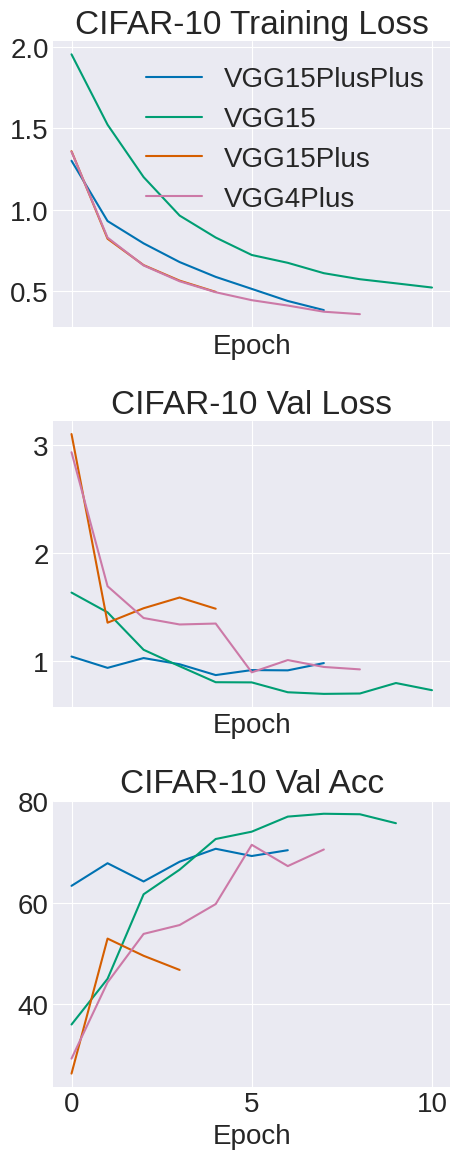

In [27]:
plot_loss_acc_x3(train_losses, val_losses, val_accs, epochs_list)

In [8]:
from vgg_nets import VGG15PlusPlus, VGG15, VGG15Plus, VGG4Plus

In [9]:
from layers import Dense
from network import DeepNetwork

In [30]:
# Quickly make a mock network for testing
class SoftmaxNet(DeepNetwork):
    def __init__(self, input_feats_shape, C, reg=0):
        super().__init__(input_feats_shape, reg)
        self.output_layer = Dense('TestDense', units=C, activation='softmax', prev_layer_or_block=None)

    def __call__(self, x):
        return self.output_layer(x)

# Load in Iris train/validation sets
train_samps = tf.constant(np.load('data/iris/iris_train_samps.npy'), dtype=tf.float32)
train_labels = tf.constant(np.load('data/iris/iris_train_labels.npy'), dtype=tf.int32)
val_samps = tf.constant(np.load('data/iris/iris_val_samps.npy'), dtype=tf.float32)
val_labels = tf.constant(np.load('data/iris/iris_val_labels.npy'), dtype=tf.int32)

# Set some vars
C = 3
M = train_samps.shape[1]
mini_batch_sz = 25
lr = 1e-1
max_epochs = 5000
patience = 7
val_every = 1  # how often (in epochs) we check the val loss/acc/early stopping

# Create our test net
tf.random.set_seed(0)
slnet = SoftmaxNet((M,), C)
slnet.compile(lr=lr)

_, val_loss_hist, val_acc_hist, e = slnet.fit(train_samps, train_labels, val_samps, val_labels,
                                              batch_size=mini_batch_sz,
                                              max_epochs=max_epochs,
                                              patience=patience,
                                              val_every=val_every,
                                              lr_patience=3,
                                              lr_max_decays=4)

print(75*'-')
print(f'Iris test ended after {e} epochs with final val loss/acc of {val_loss_hist[-1]:.2f}/{val_acc_hist[-1]:.2f}')
print(75*'-')

---------------------------------------------------------------------------
Dense layer output(TestDense) shape: [1, 3]
---------------------------------------------------------------------------


Epoch 1/5000: train_loss = 1.1284, val_loss = 1.3332, val_acc = 0.5306, time = 1.18s
Epoch 2/5000: train_loss = 0.9989, val_loss = 1.1339, val_acc = 0.6531, time = 0.01s
Epoch 3/5000: train_loss = 1.0263, val_loss = 0.9318, val_acc = 0.6531, time = 0.01s
Epoch 4/5000: train_loss = 0.6642, val_loss = 0.6593, val_acc = 0.6735, time = 0.01s
Epoch 5/5000: train_loss = 0.6649, val_loss = 0.4455, val_acc = 0.9184, time = 0.01s
Epoch 6/5000: train_loss = 0.4564, val_loss = 0.7123, val_acc = 0.6531, time = 0.01s
Current lr = 0.1
Updated lr = 0.05
Epoch 7/5000: train_loss = 0.6611, val_loss = 0.4919, val_acc = 0.6735, time = 0.01s
Epoch 8/5000: train_loss = 0.5820, val_loss = 0.4647, val_acc = 0.6735, time = 0.01s
Epoch 9/5000: train_loss = 0.4344, val_loss = 0.4186, val_acc = 0.6531, time = 0.01s
Epoch 10/5000: train_loss = 0.4593, val_loss = 0.4833, val_acc = 0.6531, time = 0.01s
Epoch 11/5000: train_loss = 0.4117, val_loss = 0.3558, val_acc = 0.9592, time = 0.01s
Epoch 12/5000: train_loss = 

Epoch 19/5000: train_loss = 0.3324, val_loss = 0.3149, val_acc = 0.9592, time = 0.01s
Epoch 20/5000: train_loss = 0.3348, val_loss = 0.3127, val_acc = 0.9592, time = 0.01s
Epoch 21/5000: train_loss = 0.3233, val_loss = 0.3077, val_acc = 0.9796, time = 0.01s
Epoch 22/5000: train_loss = 0.3164, val_loss = 0.3048, val_acc = 0.9796, time = 0.01s
Epoch 23/5000: train_loss = 0.3176, val_loss = 0.3080, val_acc = 0.9388, time = 0.01s
Current lr = 0.025
Updated lr = 0.0125
Epoch 24/5000: train_loss = 0.3431, val_loss = 0.3126, val_acc = 0.9184, time = 0.01s
Epoch 25/5000: train_loss = 0.3518, val_loss = 0.2993, val_acc = 0.9592, time = 0.01s
Epoch 26/5000: train_loss = 0.3142, val_loss = 0.2961, val_acc = 0.9796, time = 0.01s
Epoch 27/5000: train_loss = 0.3488, val_loss = 0.2946, val_acc = 0.9796, time = 0.01s
Epoch 28/5000: train_loss = 0.2859, val_loss = 0.2924, val_acc = 0.9796, time = 0.01s
Epoch 29/5000: train_loss = 0.2899, val_loss = 0.2950, val_acc = 0.9592, time = 0.01s
Current lr = 0.

Epoch 37/5000: train_loss = 0.2910, val_loss = 0.2875, val_acc = 0.9592, time = 0.01s
Epoch 38/5000: train_loss = 0.2989, val_loss = 0.2936, val_acc = 0.9388, time = 0.01s
Epoch 39/5000: train_loss = 0.2899, val_loss = 0.2909, val_acc = 0.9592, time = 0.01s
Epoch 40/5000: train_loss = 0.2875, val_loss = 0.2856, val_acc = 0.9592, time = 0.01s
Epoch 41/5000: train_loss = 0.2871, val_loss = 0.2816, val_acc = 0.9592, time = 0.01s
Epoch 42/5000: train_loss = 0.2920, val_loss = 0.2800, val_acc = 0.9796, time = 0.01s
Epoch 43/5000: train_loss = 0.3063, val_loss = 0.2797, val_acc = 0.9796, time = 0.01s
Epoch 44/5000: train_loss = 0.2493, val_loss = 0.2788, val_acc = 0.9796, time = 0.01s
Epoch 45/5000: train_loss = 0.3315, val_loss = 0.2775, val_acc = 0.9796, time = 0.01s
Epoch 46/5000: train_loss = 0.3104, val_loss = 0.2774, val_acc = 0.9592, time = 0.01s
Epoch 47/5000: train_loss = 0.2875, val_loss = 0.2794, val_acc = 0.9592, time = 0.01s
Epoch 48/5000: train_loss = 0.2937, val_loss = 0.2836,

In [31]:
#store lists
test_accuracies, train_losses, val_losses, val_accs, epochs_list = [], [], [], [], []

models = [(VGG4Plus, 'VGG4Plus'), (VGG15, 'VGG15'), (VGG15Plus, 'VGG15Plus'), (VGG15PlusPlus, 'VGG15PlusPlus')]

for model_class, model_name in models:
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    
    # Initialize model with He initialization
    model = model_class(C=10, input_feats_shape=(32, 32, 3))
    model.compile(optimizer='adamw')
    
    # Train model
    train_losses_bn, val_losses_bn, val_accs_bn, epochs_bn = model.fit(
        x_train, y_train, x_val, y_val, patience=15, lr_patience=4)
    
    # Evaluate on test set
    test_acc_bn, test_loss_bn = model.evaluate(x_test, y_test)
    print(f"{model_name} CIFAR-10 Test accuracy: {test_acc_bn.numpy()*100:.2f}%")
    
    test_accuracies.append(test_acc_bn.numpy())
    train_losses.append(train_losses_bn)
    val_losses.append(val_losses_bn)
    val_accs.append(val_accs_bn)
    epochs_list.append(epochs_bn)
        

---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 10]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flatten1) shape: [1, 16384]
MaxPool2D layer output(pool1) shape: [1, 16, 16, 64]
Conv2D layer output(conv2) shape: [1, 32, 32, 64]
Conv2D layer output(conv1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------


Epoch 1/10000: train_loss = 1.3016, val_loss = 1.0447, val_acc = 0.6302, time = 11.91s


Epoch 2/10000: train_loss = 0.9291, val_loss = 0.9835, val_acc = 0.6663, time = 7.74s


Epoch 3/10000: train_loss = 0.7913, val_loss = 0.9771, val_acc = 0.6609, time = 7.76s


Epoch 4/10000: train_loss = 0.6775, val_loss = 0.9310, val_acc = 0.6859, time = 7.78s


Epoch 5/10000: train_loss = 0.5856, val_loss = 0.8714, val_acc = 0.7069, time = 7.77s


Epoch 6/10000: train_loss = 0.5105, val_loss = 0.8888, val_acc = 0.7021, time = 7.77s


Epoch 7/10000: train_loss = 0.4399, val_loss = 0.9057, val_acc = 0.6973, time = 7.77s


Current lr = 0.001
Updated lr = 0.0005
Epoch 8/10000: train_loss = 0.3750, val_loss = 0.9378, val_acc = 0.7091, time = 7.73s


Epoch 9/10000: train_loss = 0.2986, val_loss = 0.8797, val_acc = 0.7282, time = 7.73s


Epoch 10/10000: train_loss = 0.2475, val_loss = 0.8835, val_acc = 0.7306, time = 7.71s


Epoch 11/10000: train_loss = 0.2088, val_loss = 0.9368, val_acc = 0.7296, time = 7.72s


Epoch 12/10000: train_loss = 0.1829, val_loss = 0.9863, val_acc = 0.7143, time = 7.75s


Current lr = 0.0005
Updated lr = 0.00025
Epoch 13/10000: train_loss = 0.1681, val_loss = 0.9944, val_acc = 0.7159, time = 7.71s


Epoch 14/10000: train_loss = 0.1354, val_loss = 0.9721, val_acc = 0.7260, time = 7.74s


Epoch 15/10000: train_loss = 0.1203, val_loss = 0.9833, val_acc = 0.7284, time = 7.72s


Epoch 16/10000: train_loss = 0.1078, val_loss = 1.0170, val_acc = 0.7282, time = 7.71s


Epoch 17/10000: train_loss = 0.0979, val_loss = 1.0478, val_acc = 0.7246, time = 7.72s


Current lr = 0.00025
Updated lr = 0.000125
Epoch 18/10000: train_loss = 0.0898, val_loss = 1.0735, val_acc = 0.7282, time = 7.76s


Early stopping triggered at epoch 19
Finished training after 18 epochs!


VGG4Plus CIFAR-10 Test accuracy: 72.71%
---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 10]
block6:
	Dropout layer output(block6/dropout_0) shape: [1, 512]
	Dense layer output(block6/dense_0) shape: [1, 512]
Flatten layer output(flatten1) shape: [1, 512]
block5:
	MaxPool2D layer output(block5/pool) shape: [1, 1, 1, 512]
	Conv2D layer output(block5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_0) shape: [1, 2, 2, 512]
block4:
	MaxPool2D layer output(block4/pool) shape: [1, 2, 2, 512]
	Conv2D layer output(block4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_0) shape: [1, 4, 4, 512]
block3:
	MaxPool2D layer output(block3/pool) shape: [1, 4, 4, 256]
	Conv2D layer output(block3/conv_2) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_1) shape: [1, 8, 8, 256]
	Conv2D laye

Epoch 1/10000: train_loss = 1.9855, val_loss = 1.7107, val_acc = 0.3291, time = 13.54s


Epoch 2/10000: train_loss = 1.5510, val_loss = 1.2905, val_acc = 0.5128, time = 8.20s


Epoch 3/10000: train_loss = 1.1885, val_loss = 1.0709, val_acc = 0.6100, time = 8.22s


Epoch 4/10000: train_loss = 0.9651, val_loss = 0.9409, val_acc = 0.6843, time = 8.23s


Epoch 5/10000: train_loss = 0.8315, val_loss = 0.8989, val_acc = 0.7043, time = 8.21s


Epoch 6/10000: train_loss = 0.7353, val_loss = 0.8091, val_acc = 0.7370, time = 8.17s


Epoch 7/10000: train_loss = 0.6673, val_loss = 0.7124, val_acc = 0.7724, time = 8.17s


Epoch 8/10000: train_loss = 0.6048, val_loss = 0.7769, val_acc = 0.7602, time = 8.17s


Epoch 9/10000: train_loss = 0.5559, val_loss = 0.7434, val_acc = 0.7578, time = 8.19s


Epoch 10/10000: train_loss = 0.5406, val_loss = 0.6982, val_acc = 0.7752, time = 8.17s


Epoch 11/10000: train_loss = 0.5034, val_loss = 0.6958, val_acc = 0.7863, time = 8.17s


Epoch 12/10000: train_loss = 0.4718, val_loss = 0.6294, val_acc = 0.8019, time = 8.17s


Epoch 13/10000: train_loss = 0.4576, val_loss = 0.7146, val_acc = 0.7744, time = 8.17s


Epoch 14/10000: train_loss = 0.4635, val_loss = 0.6388, val_acc = 0.8047, time = 8.19s


Epoch 15/10000: train_loss = 0.4403, val_loss = 0.6228, val_acc = 0.8083, time = 8.21s


Epoch 16/10000: train_loss = 0.4282, val_loss = 0.7126, val_acc = 0.7812, time = 8.22s


Epoch 17/10000: train_loss = 0.4012, val_loss = 0.6300, val_acc = 0.8101, time = 8.20s


Current lr = 0.001
Updated lr = 0.0005
Epoch 18/10000: train_loss = 0.4133, val_loss = 0.6545, val_acc = 0.7989, time = 8.20s


Epoch 19/10000: train_loss = 0.2441, val_loss = 0.5834, val_acc = 0.8299, time = 8.20s


Epoch 20/10000: train_loss = 0.2074, val_loss = 0.5911, val_acc = 0.8349, time = 8.21s


Epoch 21/10000: train_loss = 0.2055, val_loss = 0.5897, val_acc = 0.8341, time = 8.20s


Epoch 22/10000: train_loss = 0.1857, val_loss = 0.5972, val_acc = 0.8297, time = 8.22s


Epoch 23/10000: train_loss = 0.1915, val_loss = 0.6249, val_acc = 0.8293, time = 8.21s


Current lr = 0.0005
Updated lr = 0.00025
Epoch 24/10000: train_loss = 0.1866, val_loss = 0.6563, val_acc = 0.8215, time = 8.20s


Epoch 25/10000: train_loss = 0.0798, val_loss = 0.6019, val_acc = 0.8458, time = 8.20s


Epoch 26/10000: train_loss = 0.0616, val_loss = 0.6246, val_acc = 0.8446, time = 8.21s


Epoch 27/10000: train_loss = 0.0597, val_loss = 0.6404, val_acc = 0.8351, time = 8.21s


Epoch 28/10000: train_loss = 0.0734, val_loss = 0.7178, val_acc = 0.8305, time = 8.21s


Current lr = 0.00025
Updated lr = 0.000125
Epoch 29/10000: train_loss = 0.0688, val_loss = 0.6911, val_acc = 0.8389, time = 8.21s


Epoch 30/10000: train_loss = 0.0243, val_loss = 0.7141, val_acc = 0.8562, time = 8.22s


Epoch 31/10000: train_loss = 0.0147, val_loss = 0.7168, val_acc = 0.8568, time = 8.25s


Epoch 32/10000: train_loss = 0.0152, val_loss = 0.7351, val_acc = 0.8462, time = 8.22s


Early stopping triggered at epoch 33
Finished training after 32 epochs!


VGG15 CIFAR-10 Test accuracy: 84.34%


---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 10]
block6:
	Dropout layer output(block6/dropout_0) shape: [1, 512]
	Dense layer output(block6/dense_0) shape: [1, 512]
Flatten layer output(flatten1) shape: [1, 512]
block5:
	MaxPool2D layer output(block5/pool) shape: [1, 1, 1, 512]
	Conv2D layer output(block5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_0) shape: [1, 2, 2, 512]
block4:
	MaxPool2D layer output(block4/pool) shape: [1, 2, 2, 512]
	Conv2D layer output(block4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_0) shape: [1, 4, 4, 512]
block3:
	MaxPool2D layer output(block3/pool) shape: [1, 4, 4, 256]
	Conv2D layer output(block3/conv_2) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_1) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_0) shape: [1, 8, 8,

Epoch 1/10000: train_loss = 1.3680, val_loss = 2.1652, val_acc = 0.3520, time = 32.05s


Epoch 2/10000: train_loss = 0.8390, val_loss = 1.7959, val_acc = 0.4403, time = 17.42s


Epoch 3/10000: train_loss = 0.6640, val_loss = 1.2526, val_acc = 0.5673, time = 17.41s


Epoch 4/10000: train_loss = 0.5643, val_loss = 1.2822, val_acc = 0.5773, time = 17.32s


Epoch 5/10000: train_loss = 0.4867, val_loss = 1.0404, val_acc = 0.6629, time = 17.21s


Epoch 6/10000: train_loss = 0.4430, val_loss = 1.0637, val_acc = 0.6659, time = 17.19s


Epoch 7/10000: train_loss = 0.4021, val_loss = 1.0413, val_acc = 0.6398, time = 17.19s


Current lr = 0.001
Updated lr = 0.0005
Epoch 8/10000: train_loss = 0.3744, val_loss = 1.4348, val_acc = 0.5847, time = 17.22s


Epoch 9/10000: train_loss = 0.2164, val_loss = 0.7425, val_acc = 0.7692, time = 17.24s


Epoch 10/10000: train_loss = 0.1849, val_loss = 0.6366, val_acc = 0.8019, time = 17.21s


Epoch 11/10000: train_loss = 0.1770, val_loss = 0.8430, val_acc = 0.7498, time = 17.18s


Epoch 12/10000: train_loss = 0.1701, val_loss = 0.6601, val_acc = 0.7953, time = 17.20s


Current lr = 0.0005
Updated lr = 0.00025
Epoch 13/10000: train_loss = 0.1577, val_loss = 0.8658, val_acc = 0.7556, time = 17.18s


Epoch 14/10000: train_loss = 0.0729, val_loss = 0.5460, val_acc = 0.8504, time = 17.20s


Epoch 15/10000: train_loss = 0.0530, val_loss = 0.6522, val_acc = 0.8313, time = 17.19s


Epoch 16/10000: train_loss = 0.0566, val_loss = 0.5440, val_acc = 0.8540, time = 17.18s


Epoch 17/10000: train_loss = 0.0581, val_loss = 0.7233, val_acc = 0.8175, time = 17.19s


Epoch 18/10000: train_loss = 0.0629, val_loss = 0.5766, val_acc = 0.8470, time = 17.18s


Current lr = 0.00025
Updated lr = 0.000125
Epoch 19/10000: train_loss = 0.0560, val_loss = 0.6736, val_acc = 0.8297, time = 17.21s


Epoch 20/10000: train_loss = 0.0236, val_loss = 0.5401, val_acc = 0.8740, time = 17.17s


Epoch 21/10000: train_loss = 0.0136, val_loss = 0.5529, val_acc = 0.8728, time = 17.17s


Epoch 22/10000: train_loss = 0.0133, val_loss = 0.6185, val_acc = 0.8678, time = 17.20s


Epoch 23/10000: train_loss = 0.0167, val_loss = 0.7165, val_acc = 0.8530, time = 17.19s


Current lr = 0.000125
Updated lr = 6.25e-05
Epoch 24/10000: train_loss = 0.0256, val_loss = 0.6519, val_acc = 0.8604, time = 17.17s


Epoch 25/10000: train_loss = 0.0082, val_loss = 0.5767, val_acc = 0.8780, time = 17.18s


Epoch 26/10000: train_loss = 0.0053, val_loss = 0.5803, val_acc = 0.8806, time = 17.19s


Epoch 27/10000: train_loss = 0.0041, val_loss = 0.5993, val_acc = 0.8796, time = 17.22s


Epoch 28/10000: train_loss = 0.0039, val_loss = 0.6484, val_acc = 0.8756, time = 17.18s


Current lr = 6.25e-05
Updated lr = 3.125e-05
Epoch 29/10000: train_loss = 0.0050, val_loss = 0.6482, val_acc = 0.8794, time = 17.17s


Epoch 30/10000: train_loss = 0.0036, val_loss = 0.6584, val_acc = 0.8764, time = 17.21s


Epoch 31/10000: train_loss = 0.0028, val_loss = 0.6519, val_acc = 0.8808, time = 17.18s


Epoch 32/10000: train_loss = 0.0024, val_loss = 0.6488, val_acc = 0.8810, time = 17.21s


Epoch 33/10000: train_loss = 0.0016, val_loss = 0.6622, val_acc = 0.8818, time = 17.19s


Early stopping triggered at epoch 34
Finished training after 33 epochs!


VGG15Plus CIFAR-10 Test accuracy: 87.40%


---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 10]
block6:
	Dropout layer output(block6/dropout_0) shape: [1, 512]
	Dense layer output(block6/dense_0) shape: [1, 512]
Flatten layer output(flatten1) shape: [1, 512]
block5:
	MaxPool2D layer output(block5/pool) shape: [1, 1, 1, 512]
	Conv2D layer output(block5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_0) shape: [1, 2, 2, 512]
block4:
	MaxPool2D layer output(block4/pool) shape: [1, 2, 2, 512]
	Conv2D layer output(block4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_0) shape: [1, 4, 4, 512]
block3:
	MaxPool2D layer output(block3/pool) shape: [1, 4, 4, 256]
	Conv2D layer output(block3/conv_2) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_1) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_0) shape: [1, 8, 8,

Epoch 1/10000: train_loss = 1.3910, val_loss = 2.5921, val_acc = 0.3149, time = 31.48s


Epoch 2/10000: train_loss = 0.8396, val_loss = 1.9100, val_acc = 0.4319, time = 17.22s


Epoch 3/10000: train_loss = 0.6645, val_loss = 1.1993, val_acc = 0.5909, time = 17.25s


Epoch 4/10000: train_loss = 0.5617, val_loss = 1.0987, val_acc = 0.6304, time = 17.14s


Epoch 5/10000: train_loss = 0.4863, val_loss = 1.5218, val_acc = 0.5198, time = 17.09s


Epoch 6/10000: train_loss = 0.4458, val_loss = 0.8550, val_acc = 0.7244, time = 17.07s


Epoch 7/10000: train_loss = 0.4044, val_loss = 0.8882, val_acc = 0.7206, time = 17.07s


Epoch 8/10000: train_loss = 0.3692, val_loss = 1.2436, val_acc = 0.6232, time = 17.12s


Current lr = 0.001
Updated lr = 0.0005
Epoch 9/10000: train_loss = 0.3493, val_loss = 1.5264, val_acc = 0.5449, time = 17.12s


Epoch 10/10000: train_loss = 0.2034, val_loss = 0.5753, val_acc = 0.8205, time = 17.10s


Epoch 11/10000: train_loss = 0.1700, val_loss = 0.5884, val_acc = 0.8161, time = 17.11s


Epoch 12/10000: train_loss = 0.1566, val_loss = 0.9471, val_acc = 0.7232, time = 17.07s


Epoch 13/10000: train_loss = 0.1599, val_loss = 0.7226, val_acc = 0.7897, time = 17.10s


Current lr = 0.0005
Updated lr = 0.00025
Epoch 14/10000: train_loss = 0.1382, val_loss = 0.5953, val_acc = 0.8215, time = 17.11s


Epoch 15/10000: train_loss = 0.0652, val_loss = 0.5055, val_acc = 0.8550, time = 17.10s


Epoch 16/10000: train_loss = 0.0552, val_loss = 0.5803, val_acc = 0.8389, time = 17.10s


Epoch 17/10000: train_loss = 0.0521, val_loss = 0.7357, val_acc = 0.8219, time = 17.08s


Epoch 18/10000: train_loss = 0.0575, val_loss = 0.5922, val_acc = 0.8444, time = 17.06s


Current lr = 0.00025
Updated lr = 0.000125
Epoch 19/10000: train_loss = 0.0522, val_loss = 0.6500, val_acc = 0.8367, time = 17.08s


Epoch 20/10000: train_loss = 0.0213, val_loss = 0.5848, val_acc = 0.8668, time = 17.06s


Epoch 21/10000: train_loss = 0.0114, val_loss = 0.5884, val_acc = 0.8714, time = 17.09s


Epoch 22/10000: train_loss = 0.0154, val_loss = 0.6538, val_acc = 0.8590, time = 17.06s


Epoch 23/10000: train_loss = 0.0183, val_loss = 0.6234, val_acc = 0.8656, time = 17.05s


Current lr = 0.000125
Updated lr = 6.25e-05
Epoch 24/10000: train_loss = 0.0196, val_loss = 0.6229, val_acc = 0.8644, time = 17.10s


Epoch 25/10000: train_loss = 0.0067, val_loss = 0.5952, val_acc = 0.8768, time = 17.06s


Epoch 26/10000: train_loss = 0.0043, val_loss = 0.6028, val_acc = 0.8758, time = 17.08s


Epoch 27/10000: train_loss = 0.0037, val_loss = 0.6236, val_acc = 0.8766, time = 17.05s


Epoch 28/10000: train_loss = 0.0031, val_loss = 0.6253, val_acc = 0.8776, time = 17.05s


Early stopping triggered at epoch 29
Finished training after 28 epochs!


VGG15PlusPlus CIFAR-10 Test accuracy: 87.05%


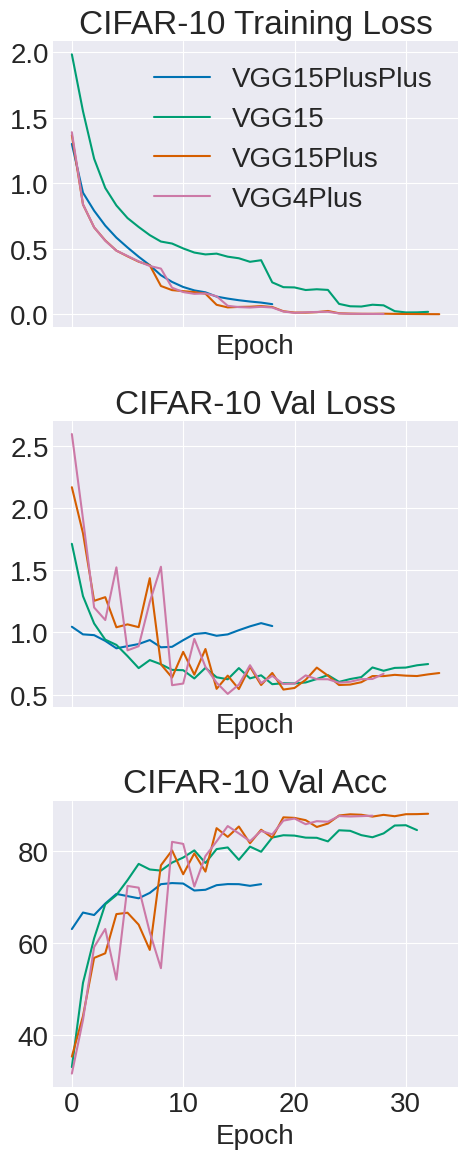

CIFAR-10 test accuracy:
VGG4Plus: 72.71%
VGG15: 84.34%
VGG15Plus: 87.40%
VGG15PlusPlus: 87.05%


In [33]:
plot_loss_acc_x3(train_losses, val_losses, val_accs, epochs_list)

# print('CIFAR-10 test accuracy:')
# for i in range(len(model_name)):
#     print(f'{model_name}: {100*val_accs_bn[i]:.2f}%')
    
print('CIFAR-10 test accuracy:')
for i in range(len(models)):
    print(f'{models[i][1]}: {100 * test_accuracies[i]:.2f}%')

In [ ]:

#store lists
from vgg_nets import VGG16

test_accuracies, train_losses, val_losses, val_accs, epochs_list = [], [], [], [], []

models = [(VGG15Plus, 'VGG15Plus'), (VGG16, 'VGG16')]

for model_class, model_name in models:
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)
    
    # Initialize model with He initialization
    model = model_class(C=10, input_feats_shape=(32, 32, 3))
    model.compile(optimizer='adamw')
    
    # Train model
    train_losses_bn, val_losses_bn, val_accs_bn, epochs_bn = model.fit(
        x_train, y_train, x_val, y_val, patience=15, lr_patience=4)
    
    # Evaluate on test set
    test_acc_bn, test_loss_bn = model.evaluate(x_test, y_test)
    print(f"{model_name} CIFAR-10 Test accuracy: {test_acc_bn.numpy()*100:.2f}%")
    
    test_accuracies.append(test_acc_bn.numpy())
    train_losses.append(train_losses_bn)
    val_losses.append(val_losses_bn)
    val_accs.append(val_accs_bn)
    epochs_list.append(epochs_bn)
  

---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 10]
block6:
	Dropout layer output(block6/dropout_0) shape: [1, 512]
	Dense layer output(block6/dense_0) shape: [1, 512]
Flatten layer output(flatten1) shape: [1, 512]
block5:
	MaxPool2D layer output(block5/pool) shape: [1, 1, 1, 512]
	Conv2D layer output(block5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_0) shape: [1, 2, 2, 512]
block4:
	MaxPool2D layer output(block4/pool) shape: [1, 2, 2, 512]
	Conv2D layer output(block4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_0) shape: [1, 4, 4, 512]
block3:
	MaxPool2D layer output(block3/pool) shape: [1, 4, 4, 256]
	Conv2D layer output(block3/conv_2) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_1) shape: [1, 8, 8, 256]
	Conv2D layer output(block3/conv_0) shape: [1, 8, 8,

Epoch 1/10000: train_loss = 1.3659, val_loss = 2.7711, val_acc = 0.3197, time = 32.09s


Epoch 2/10000: train_loss = 0.8377, val_loss = 1.2786, val_acc = 0.5535, time = 17.63s


Epoch 3/10000: train_loss = 0.6620, val_loss = 1.0807, val_acc = 0.6392, time = 17.57s


Epoch 4/10000: train_loss = 0.5686, val_loss = 0.9824, val_acc = 0.6737, time = 17.42s


Epoch 5/10000: train_loss = 0.4831, val_loss = 1.0806, val_acc = 0.6396, time = 17.34s


Epoch 6/10000: train_loss = 0.4393, val_loss = 0.8415, val_acc = 0.7282, time = 17.32s


Epoch 7/10000: train_loss = 0.4083, val_loss = 1.2618, val_acc = 0.5881, time = 17.33s


Epoch 8/10000: train_loss = 0.3666, val_loss = 1.3095, val_acc = 0.6034, time = 17.39s


Current lr = 0.001
Updated lr = 0.0005
Epoch 9/10000: train_loss = 0.3469, val_loss = 1.2909, val_acc = 0.6128, time = 17.41s


Epoch 10/10000: train_loss = 0.2049, val_loss = 0.6891, val_acc = 0.7931, time = 17.37s


Epoch 11/10000: train_loss = 0.1680, val_loss = 0.6567, val_acc = 0.8019, time = 17.36s


Epoch 12/10000: train_loss = 0.1607, val_loss = 0.5731, val_acc = 0.8253, time = 17.32s


Epoch 13/10000: train_loss = 0.1614, val_loss = 0.7780, val_acc = 0.7728, time = 17.33s


Epoch 14/10000: train_loss = 0.1434, val_loss = 0.7848, val_acc = 0.7698, time = 17.38s


Current lr = 0.0005
Updated lr = 0.00025
Epoch 15/10000: train_loss = 0.1522, val_loss = 0.6184, val_acc = 0.8145, time = 17.34s


Epoch 16/10000: train_loss = 0.0651, val_loss = 0.6071, val_acc = 0.8347, time = 17.34s


Epoch 17/10000: train_loss = 0.0485, val_loss = 0.6543, val_acc = 0.8317, time = 17.33s


Epoch 18/10000: train_loss = 0.0516, val_loss = 0.5950, val_acc = 0.8508, time = 17.30s


Epoch 19/10000: train_loss = 0.0548, val_loss = 0.6419, val_acc = 0.8335, time = 17.33s


Epoch 20/10000: train_loss = 0.0544, val_loss = 0.6000, val_acc = 0.8506, time = 17.34s


Current lr = 0.00025
Updated lr = 0.000125
Epoch 21/10000: train_loss = 0.0565, val_loss = 0.6696, val_acc = 0.8329, time = 17.36s


Epoch 22/10000: train_loss = 0.0219, val_loss = 0.5602, val_acc = 0.8684, time = 17.31s


Epoch 23/10000: train_loss = 0.0110, val_loss = 0.5849, val_acc = 0.8732, time = 17.30s


Epoch 24/10000: train_loss = 0.0112, val_loss = 0.7196, val_acc = 0.8456, time = 17.33s


Epoch 25/10000: train_loss = 0.0159, val_loss = 0.7062, val_acc = 0.8524, time = 17.40s


Current lr = 0.000125
Updated lr = 6.25e-05
Epoch 26/10000: train_loss = 0.0196, val_loss = 0.7214, val_acc = 0.8480, time = 17.43s


Epoch 27/10000: train_loss = 0.0087, val_loss = 0.5982, val_acc = 0.8732, time = 17.39s


Epoch 28/10000: train_loss = 0.0041, val_loss = 0.6254, val_acc = 0.8724, time = 17.39s


Epoch 29/10000: train_loss = 0.0039, val_loss = 0.6520, val_acc = 0.8690, time = 17.42s


Epoch 30/10000: train_loss = 0.0046, val_loss = 0.6964, val_acc = 0.8638, time = 17.42s


Current lr = 6.25e-05
Updated lr = 3.125e-05
Epoch 31/10000: train_loss = 0.0079, val_loss = 0.6827, val_acc = 0.8662, time = 17.43s


Epoch 32/10000: train_loss = 0.0035, val_loss = 0.6637, val_acc = 0.8702, time = 17.42s


Epoch 33/10000: train_loss = 0.0022, val_loss = 0.6825, val_acc = 0.8756, time = 17.40s


Epoch 34/10000: train_loss = 0.0018, val_loss = 0.6805, val_acc = 0.8746, time = 17.39s


Epoch 35/10000: train_loss = 0.0020, val_loss = 0.7014, val_acc = 0.8744, time = 17.41s


Early stopping triggered at epoch 36
Finished training after 35 epochs!


VGG15Plus CIFAR-10 Test accuracy: 87.98%


---------------------------------------------------------------------------
Dense layer output(denseout) shape: [1, 10]
block7:
	Dropout layer output(block7/dropout_0) shape: [1, 512]
	Dense layer output(block7/dense_0) shape: [1, 512]
block6:
	Dropout layer output(block6/dropout_0) shape: [1, 512]
	Dense layer output(block6/dense_0) shape: [1, 512]
Flatten layer output(flatten1) shape: [1, 512]
block5:
	MaxPool2D layer output(block5/pool) shape: [1, 1, 1, 512]
	Conv2D layer output(block5/conv_2) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_1) shape: [1, 2, 2, 512]
	Conv2D layer output(block5/conv_0) shape: [1, 2, 2, 512]
block4:
	MaxPool2D layer output(block4/pool) shape: [1, 2, 2, 512]
	Conv2D layer output(block4/conv_2) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_1) shape: [1, 4, 4, 512]
	Conv2D layer output(block4/conv_0) shape: [1, 4, 4, 512]
block3:
	MaxPool2D layer output(block3/pool) shape: [1, 4, 4, 256]
	Conv2D layer output(block3/conv_2) shape: [1, 8, 8,

Epoch 1/10000: train_loss = 1.5341, val_loss = 2.9590, val_acc = 0.2346, time = 32.93s


Epoch 2/10000: train_loss = 0.9425, val_loss = 1.5212, val_acc = 0.4988, time = 17.59s


Epoch 3/10000: train_loss = 0.7547, val_loss = 1.3005, val_acc = 0.5469, time = 17.59s


Epoch 4/10000: train_loss = 0.6336, val_loss = 1.2823, val_acc = 0.5861, time = 17.45s


Epoch 5/10000: train_loss = 0.5465, val_loss = 1.3590, val_acc = 0.5467, time = 17.37s


Epoch 6/10000: train_loss = 0.4942, val_loss = 1.3750, val_acc = 0.5699, time = 17.35s


Epoch 7/10000: train_loss = 0.4534, val_loss = 1.2371, val_acc = 0.5974, time = 17.42s


Epoch 8/10000: train_loss = 0.4094, val_loss = 1.8440, val_acc = 0.4716, time = 17.43s


Epoch 9/10000: train_loss = 0.3961, val_loss = 1.4483, val_acc = 0.5761, time = 17.44s


Epoch 10/10000: train_loss = 0.3742, val_loss = 0.9836, val_acc = 0.6953, time = 17.40s


Epoch 11/10000: train_loss = 0.3636, val_loss = 0.8234, val_acc = 0.7468, time = 17.36s


Epoch 12/10000: train_loss = 0.3427, val_loss = 0.8648, val_acc = 0.7248, time = 17.37s


Epoch 13/10000: train_loss = 0.3402, val_loss = 1.0916, val_acc = 0.6657, time = 17.43s


Current lr = 0.001
Updated lr = 0.0005
Epoch 14/10000: train_loss = 0.3342, val_loss = 1.2316, val_acc = 0.6100, time = 17.40s


Epoch 15/10000: train_loss = 0.1937, val_loss = 0.8065, val_acc = 0.7576, time = 17.40s


Epoch 16/10000: train_loss = 0.1618, val_loss = 0.5795, val_acc = 0.8233, time = 17.39s


Epoch 17/10000: train_loss = 0.1606, val_loss = 0.8175, val_acc = 0.7716, time = 17.38s


Epoch 18/10000: train_loss = 0.1559, val_loss = 0.7443, val_acc = 0.7812, time = 17.38s


Current lr = 0.0005
Updated lr = 0.00025
Epoch 19/10000: train_loss = 0.1614, val_loss = 0.6744, val_acc = 0.8031, time = 17.38s


Epoch 20/10000: train_loss = 0.0703, val_loss = 0.5639, val_acc = 0.8480, time = 17.39s


Epoch 21/10000: train_loss = 0.0562, val_loss = 0.7367, val_acc = 0.8079, time = 17.36s


Epoch 22/10000: train_loss = 0.0573, val_loss = 0.6553, val_acc = 0.8383, time = 17.38s


Epoch 23/10000: train_loss = 0.0581, val_loss = 0.5486, val_acc = 0.8626, time = 17.37s


Epoch 24/10000: train_loss = 0.0640, val_loss = 0.6578, val_acc = 0.8363, time = 17.39s


Epoch 25/10000: train_loss = 0.0572, val_loss = 0.6936, val_acc = 0.8317, time = 17.41s


Current lr = 0.00025
Updated lr = 0.000125
Epoch 26/10000: train_loss = 0.0560, val_loss = 0.7283, val_acc = 0.8305, time = 17.38s


Epoch 27/10000: train_loss = 0.0248, val_loss = 0.6032, val_acc = 0.8596, time = 17.37s


Epoch 28/10000: train_loss = 0.0140, val_loss = 0.6178, val_acc = 0.8636, time = 17.41s


Epoch 29/10000: train_loss = 0.0152, val_loss = 0.6421, val_acc = 0.8636, time = 17.36s


Epoch 30/10000: train_loss = 0.0253, val_loss = 0.6715, val_acc = 0.8648, time = 17.40s


Current lr = 0.000125
Updated lr = 6.25e-05
Epoch 31/10000: train_loss = 0.0216, val_loss = 0.7103, val_acc = 0.8534, time = 17.42s


Epoch 32/10000: train_loss = 0.0107, val_loss = 0.6843, val_acc = 0.8654, time = 17.42s


Epoch 33/10000: train_loss = 0.0061, val_loss = 0.6753, val_acc = 0.8694, time = 17.47s


Epoch 34/10000: train_loss = 0.0058, val_loss = 0.6634, val_acc = 0.8728, time = 17.46s


Epoch 35/10000: train_loss = 0.0044, val_loss = 0.7292, val_acc = 0.8668, time = 17.38s


Epoch 36/10000: train_loss = 0.0042, val_loss = 0.7603, val_acc = 0.8662, time = 17.38s


Early stopping triggered at epoch 37
Finished training after 36 epochs!


VGG16 CIFAR-10 Test accuracy: 85.95%


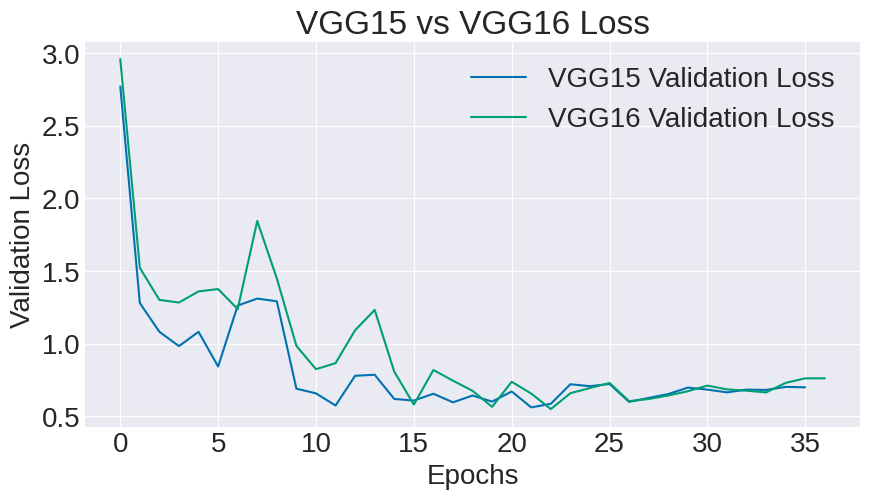

In [ ]:
# plot_loss_acc_x3(train_losses, val_losses, val_accs, epochs_list)

# print('CIFAR-10 test accuracy:')
# for i in range(len(model_name)):
#     print(f'{model_name}: {100*val_accs_bn[i]:.2f}%')

# Plot accuracy comparison
plt.figure(figsize=(10,5))
plt.plot(val_losses[0], label='VGG15 Validation Loss')
plt.plot(val_losses[1], label='VGG16 Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('VGG15 vs VGG16 Loss')
plt.legend()
plt.show()

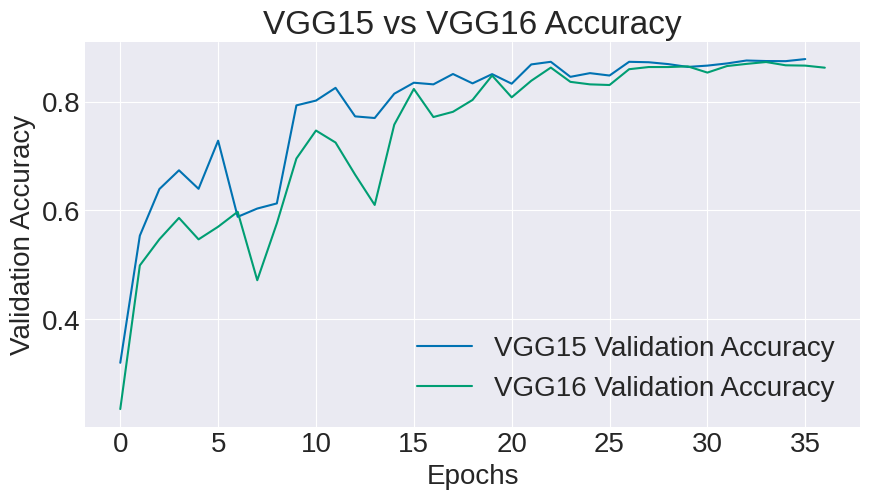

In [ ]:
# plot_loss_acc_x3(train_losses, val_losses, val_accs, epochs_list)

# print('CIFAR-10 test accuracy:')
# for i in range(len(model_name)):
#     print(f'{model_name}: {100*val_accs_bn[i]:.2f}%')

# Plot accuracy comparison
plt.figure(figsize=(10,5))
plt.plot(val_accs[0], label='VGG15 Validation Accuracy')
plt.plot(val_accs[1], label='VGG16 Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('VGG15 vs VGG16 Accuracy')
plt.legend()
plt.show()